In [1]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

import re
import funciones as fn

import warnings
warnings.filterwarnings('ignore')  # esto es para quitar prints

pd.set_option('display.max_columns', None)   # mostrar todas las columnas del df

In [2]:
actor_ori=pd.read_csv('data/actor.csv')
actor=actor_ori.copy()
category_ori=pd.read_csv('data/category.csv')
category=category_ori.copy()
film_ori=pd.read_csv('data/film.csv')
film=film_ori.copy()
inventory_ori=pd.read_csv('data/inventory.csv')
inventory=inventory_ori.copy()
language_ori=pd.read_csv('data/language.csv')
language=language_ori.copy()
old_ori=pd.read_csv('data/old_HDD.csv')
old=old_ori.copy()
rental_ori=pd.read_csv('data/rental.csv')
rental=rental_ori.copy()

# ACTOR

In [3]:
actor.head()

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33


In [4]:
actor.info(memory_usage='deep') #Sin nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   actor_id     200 non-null    int64 
 1   first_name   200 non-null    object
 2   last_name    200 non-null    object
 3   last_update  200 non-null    object
dtypes: int64(1), object(3)
memory usage: 41.0 KB


In [5]:
columns = actor.columns
columns

Index(['actor_id', 'first_name', 'last_name', 'last_update'], dtype='object')

In [6]:
actor.shape

(200, 4)

### Nulos

'N nan cols: 0'

Series([], dtype: float64)

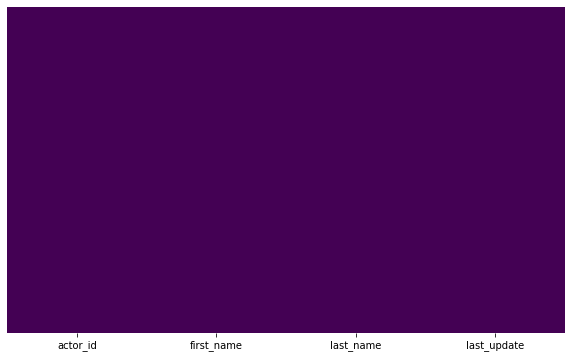

In [7]:
fn.check_nan(actor)

### Valores incorrectos

In [8]:
fn.check_unique(actor, columns) #Parece Todo Bien

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
['PENELOPE' 'NICK' 'ED' 'JENNIFER' 'JOHNNY' 'BETTE' 'GRACE' 'MATTHEW'
 'JOE' 'CHRISTIAN' 'ZERO' 'KARL' 'UMA' 'VIVIEN' 'CUBA' 'FRED' 'HELEN'
 'DAN' 'BOB' 'LUCILLE' 'KIRSTEN' 'ELVIS' 'SANDR

In [9]:
fn.check_value(actor, columns) #Parece todo Correcto

1      1
138    1
128    1
129    1
130    1
Name: actor_id, dtype: int64
PENELOPE    4
JULIA       4
KENNETH     4
GENE        3
GROUCHO     3
Name: first_name, dtype: int64
KILMER     5
TEMPLE     4
NOLTE      4
GUINESS    3
ALLEN      3
Name: last_name, dtype: int64
2006-02-15 04:34:33    200
Name: last_update, dtype: int64


### Duplicados

In [10]:
actor.duplicated().any() #No hay duplicados

False

In [11]:
actor[['first_name', 'last_name']].duplicated().any() #Hay duplicados si no contamos el ID

True

In [12]:
actor[['first_name', 'last_name']].value_counts().head() #Solo hay uno, decido dejarlo por que pueden ser dos distintos.

first_name  last_name
SUSAN       DAVIS        2
ADAM        GRANT        1
MILLA       KEITEL       1
MATTHEW     LEIGH        1
MEG         HAWKE        1
dtype: int64

### Cambio del tipo de dato, optimizacion de memoria

In [13]:
actor.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   actor_id     200 non-null    int64 
 1   first_name   200 non-null    object
 2   last_name    200 non-null    object
 3   last_update  200 non-null    object
dtypes: int64(1), object(3)
memory usage: 41.0 KB


In [14]:
actor.last_update=pd.to_datetime(actor.last_update, format='%Y-%m-%d')

actor.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   actor_id     200 non-null    int64         
 1   first_name   200 non-null    object        
 2   last_name    200 non-null    object        
 3   last_update  200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 27.8 KB


In [15]:
for c in actor.select_dtypes('object').columns:
    
    actor[c]=actor[c].astype('category')
    
actor.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   actor_id     200 non-null    int64         
 1   first_name   200 non-null    category      
 2   last_name    200 non-null    category      
 3   last_update  200 non-null    datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(1)
memory usage: 27.2 KB


In [16]:
for c in actor.select_dtypes('integer').columns:
    
    actor[c]=pd.to_numeric(actor[c], downcast='integer')
    
actor.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   actor_id     200 non-null    int16         
 1   first_name   200 non-null    category      
 2   last_name    200 non-null    category      
 3   last_update  200 non-null    datetime64[ns]
dtypes: category(2), datetime64[ns](1), int16(1)
memory usage: 26.0 KB


In [135]:
actor.drop(columns='last_update', inplace=True)

In [136]:
actor.head()

,actor_id,first_name,last_name
0,1,PENELOPE,GUINESS
1,2,NICK,WAHLBERG
2,3,ED,CHASE
3,4,JENNIFER,DAVIS
4,5,JOHNNY,LOLLOBRIGIDA


In [ ]:
rental.drop(columns='last_update', inplace=True)

rental.head()

# CATEGORY

In [17]:
category.head()

,category_id,name,last_update
0,1,Action,2006-02-15 04:46:27
1,2,Animation,2006-02-15 04:46:27
2,3,Children,2006-02-15 04:46:27
3,4,Classics,2006-02-15 04:46:27
4,5,Comedy,2006-02-15 04:46:27


In [18]:
category.info(memory_usage='deep') #Sin nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  16 non-null     int64 
 1   name         16 non-null     object
 2   last_update  16 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4 KB


In [19]:
columns = category.columns
columns

Index(['category_id', 'name', 'last_update'], dtype='object')

In [21]:
category.shape

(16, 3)

### Nulos

'N nan cols: 0'

Series([], dtype: float64)

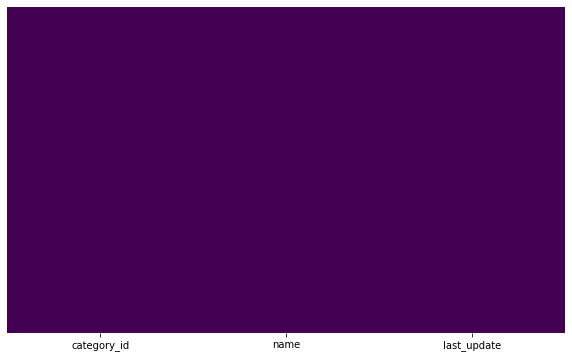

In [24]:
fn.check_nan(category)

### Valores incorrectos

In [25]:
fn.check_unique(category, columns) #Parece Todo Bien

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
['Action' 'Animation' 'Children' 'Classics' 'Comedy' 'Documentary' 'Drama'
 'Family' 'Foreign' 'Games' 'Horror' 'Music' 'New' 'Sci-Fi' 'Sports'
 'Travel']
['2006-02-15 04:46:27']


In [27]:
fn.check_value(category, columns) #Parece todo Correcto

1    1
2    1
3    1
4    1
5    1
Name: category_id, dtype: int64
Action       1
Animation    1
Children     1
Classics     1
Comedy       1
Name: name, dtype: int64
2006-02-15 04:46:27    16
Name: last_update, dtype: int64


### Duplicados

In [29]:
category.duplicated().any() #No hay duplicados

False

In [31]:
category[['name', 'last_update']].duplicated().any() #No hay duplicados

False

### Cambio del tipo de dato, optimizacion de memoria

In [32]:
category.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  16 non-null     int64 
 1   name         16 non-null     object
 2   last_update  16 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4 KB


In [33]:
category.last_update=pd.to_datetime(category.last_update, format='%Y-%m-%d')

category.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   category_id  16 non-null     int64         
 1   name         16 non-null     object        
 2   last_update  16 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.4 KB


In [35]:
for c in category.select_dtypes('object').columns:
    
    category[c]=category[c].astype('category')
    
category.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   category_id  16 non-null     int64         
 1   name         16 non-null     category      
 2   last_update  16 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [36]:
for c in category.select_dtypes('integer').columns:
    
    category[c]=pd.to_numeric(category[c], downcast='integer')
    
category.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   category_id  16 non-null     int8          
 1   name         16 non-null     category      
 2   last_update  16 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](1), int8(1)
memory usage: 1.8 KB


In [132]:
category.drop(columns='last_update', inplace=True)

In [133]:
category.head()

,category_id,name
0,1,Action
1,2,Animation
2,3,Children
3,4,Classics
4,5,Comedy


# FILM

In [37]:
film.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,NaN,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,NaN,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,NaN,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,NaN,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,NaN,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42


In [38]:
film.info(memory_usage='deep') #Sin nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   film_id               1000 non-null   int64  
 1   title                 1000 non-null   object 
 2   description           1000 non-null   object 
 3   release_year          1000 non-null   int64  
 4   language_id           1000 non-null   int64  
 5   original_language_id  0 non-null      float64
 6   rental_duration       1000 non-null   int64  
 7   rental_rate           1000 non-null   float64
 8   length                1000 non-null   int64  
 9   replacement_cost      1000 non-null   float64
 10  rating                1000 non-null   object 
 11  special_features      1000 non-null   object 
 12  last_update           1000 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 495.3 KB


In [40]:
columns = film.columns
columns

Index(['film_id', 'title', 'description', 'release_year', 'language_id',
       'original_language_id', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'special_features', 'last_update'],
      dtype='object')

In [41]:
film.shape

(1000, 13)

### Nulos

'N nan cols: 1'

original_language_id    100.0
dtype: float64

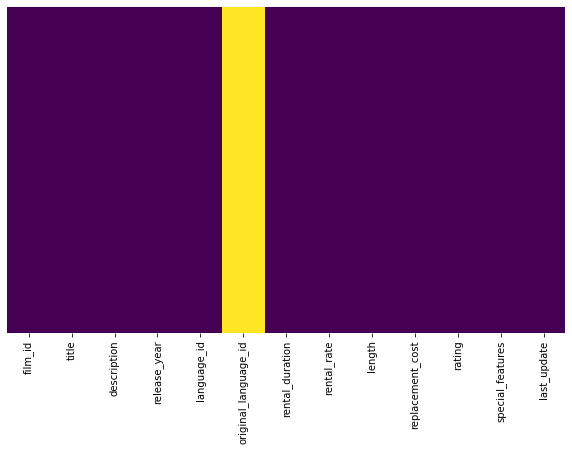

In [43]:
fn.check_nan(film) #Columna entera de nulos

In [44]:
film.drop(columns='original_language_id', inplace=True)

'N nan cols: 0'

Series([], dtype: float64)

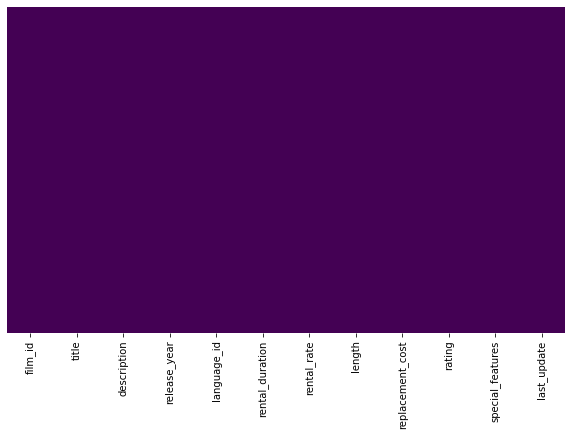

In [45]:
fn.check_nan(film) #Ya no tenemos los nulos

In [47]:
columns = film.columns
columns

Index(['film_id', 'title', 'description', 'release_year', 'language_id',
       'rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'special_features', 'last_update'],
      dtype='object')

### Valores incorrectos

In [48]:
fn.check_unique(film, columns) #Parece Todo Bien

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  195  196
  197 

In [50]:
fn.check_value(film, columns) #Parece todo Correcto

1      1
672    1
659    1
660    1
661    1
Name: film_id, dtype: int64
ACADEMY DINOSAUR    1
PERFECT GROOVE      1
PARK CITIZEN        1
PARTY KNOCK         1
PAST SUICIDES       1
Name: title, dtype: int64
A Epic Drama of a Feminist And a Mad Scientist who must Battle a Teacher in The Canadian Rockies                   1
A Thrilling Yarn of a Dog And a Dog who must Build a Husband in A Baloon                                           1
A Taut Epistle of a Sumo Wrestler And a Girl who must Face a Husband in Ancient Japan                              1
A Fateful Display of a Technical Writer And a Butler who must Battle a Sumo Wrestler in An Abandoned Mine Shaft    1
A Intrepid Tale of a Madman And a Astronaut who must Challenge a Hunter in A Monastery                             1
Name: description, dtype: int64
2006    1000
Name: release_year, dtype: int64
1    1000
Name: language_id, dtype: int64
6    212
3    203
4    203
7    191
5    191
Name: rental_duration, dtype: int64
0.99 

### Duplicados

In [53]:
film.duplicated().any() #No hay duplicados

False

In [54]:
film[['title', 'description', 'release_year', 'language_id',
          'rental_duration', 'rental_rate', 'length', 'replacement_cost',
          'rating', 'special_features', 'last_update']].duplicated().any() #No hay duplicados

False

### Cambio del tipo de dato, optimizacion de memoria

In [55]:
film.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   film_id           1000 non-null   int64  
 1   title             1000 non-null   object 
 2   description       1000 non-null   object 
 3   release_year      1000 non-null   int64  
 4   language_id       1000 non-null   int64  
 5   rental_duration   1000 non-null   int64  
 6   rental_rate       1000 non-null   float64
 7   length            1000 non-null   int64  
 8   replacement_cost  1000 non-null   float64
 9   rating            1000 non-null   object 
 10  special_features  1000 non-null   object 
 11  last_update       1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 487.5 KB


In [56]:
film.last_update=pd.to_datetime(film.last_update, format='%Y-%m-%d')

film.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   film_id           1000 non-null   int64         
 1   title             1000 non-null   object        
 2   description       1000 non-null   object        
 3   release_year      1000 non-null   int64         
 4   language_id       1000 non-null   int64         
 5   rental_duration   1000 non-null   int64         
 6   rental_rate       1000 non-null   float64       
 7   length            1000 non-null   int64         
 8   replacement_cost  1000 non-null   float64       
 9   rating            1000 non-null   object        
 10  special_features  1000 non-null   object        
 11  last_update       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 421.1 KB


In [57]:
for c in film.select_dtypes('object').columns:
    
    film[c]=film[c].astype('category')
    
film.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   film_id           1000 non-null   int64         
 1   title             1000 non-null   category      
 2   description       1000 non-null   category      
 3   release_year      1000 non-null   int64         
 4   language_id       1000 non-null   int64         
 5   rental_duration   1000 non-null   int64         
 6   rental_rate       1000 non-null   float64       
 7   length            1000 non-null   int64         
 8   replacement_cost  1000 non-null   float64       
 9   rating            1000 non-null   category      
 10  special_features  1000 non-null   category      
 11  last_update       1000 non-null   datetime64[ns]
dtypes: category(4), datetime64[ns](1), float64(2), int64(5)
memory usage: 352.2 KB


In [58]:
for c in film.select_dtypes('integer').columns:
    
    film[c]=pd.to_numeric(film[c], downcast='integer')
    
film.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   film_id           1000 non-null   int16         
 1   title             1000 non-null   category      
 2   description       1000 non-null   category      
 3   release_year      1000 non-null   int16         
 4   language_id       1000 non-null   int8          
 5   rental_duration   1000 non-null   int8          
 6   rental_rate       1000 non-null   float64       
 7   length            1000 non-null   int16         
 8   replacement_cost  1000 non-null   float64       
 9   rating            1000 non-null   category      
 10  special_features  1000 non-null   category      
 11  last_update       1000 non-null   datetime64[ns]
dtypes: category(4), datetime64[ns](1), float64(2), int16(3), int8(2)
memory usage: 320.9 KB


In [59]:
for c in film.select_dtypes('float').columns:
    
    film[c]=pd.to_numeric(film[c], downcast='float')
    
film.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   film_id           1000 non-null   int16         
 1   title             1000 non-null   category      
 2   description       1000 non-null   category      
 3   release_year      1000 non-null   int16         
 4   language_id       1000 non-null   int8          
 5   rental_duration   1000 non-null   int8          
 6   rental_rate       1000 non-null   float32       
 7   length            1000 non-null   int16         
 8   replacement_cost  1000 non-null   float32       
 9   rating            1000 non-null   category      
 10  special_features  1000 non-null   category      
 11  last_update       1000 non-null   datetime64[ns]
dtypes: category(4), datetime64[ns](1), float32(2), int16(3), int8(2)
memory usage: 313.1 KB


In [130]:
film.drop(columns='last_update', inplace=True)

In [131]:
film.head()

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes"
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes"
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes"
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes"
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,6,2.99,130,22.99,G,Deleted Scenes


# INVENTORY

In [60]:
inventory.head()

,inventory_id,film_id,store_id,last_update
0,1,1,1,2006-02-15 05:09:17
1,2,1,1,2006-02-15 05:09:17
2,3,1,1,2006-02-15 05:09:17
3,4,1,1,2006-02-15 05:09:17
4,5,1,2,2006-02-15 05:09:17


In [61]:
inventory.info(memory_usage='deep') #Sin nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  1000 non-null   int64 
 1   film_id       1000 non-null   int64 
 2   store_id      1000 non-null   int64 
 3   last_update   1000 non-null   object
dtypes: int64(3), object(1)
memory usage: 97.8 KB


In [62]:
columns = inventory.columns
columns

Index(['inventory_id', 'film_id', 'store_id', 'last_update'], dtype='object')

In [63]:
inventory.shape

(1000, 4)

### Nulos

'N nan cols: 0'

Series([], dtype: float64)

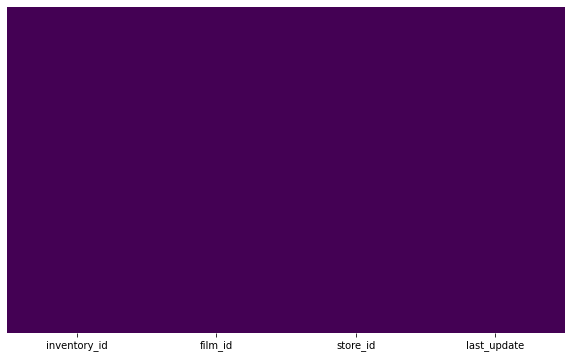

In [64]:
fn.check_nan(inventory) #Columnas sin nulos

### Valores incorrectos

In [65]:
fn.check_unique(inventory, columns) #Parece Todo Bien

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  195  196
  197 

In [66]:
fn.check_value(inventory, columns) #Parece todo Correcto

1      1
672    1
659    1
660    1
661    1
Name: inventory_id, dtype: int64
1      8
127    8
73     8
174    8
86     8
Name: film_id, dtype: int64
1    503
2    497
Name: store_id, dtype: int64
2006-02-15 05:09:17    1000
Name: last_update, dtype: int64


### Duplicados

In [67]:
inventory.duplicated().any() #No hay duplicados

False

In [69]:
inventory[['film_id', 'store_id', 'last_update']].duplicated().any() #Hay duplicados sin contar la columna de id_inventory nos puede interesar

True

### Cambio del tipo de dato, optimizacion de memoria

In [70]:
inventory.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  1000 non-null   int64 
 1   film_id       1000 non-null   int64 
 2   store_id      1000 non-null   int64 
 3   last_update   1000 non-null   object
dtypes: int64(3), object(1)
memory usage: 97.8 KB


In [71]:
inventory.last_update=pd.to_datetime(inventory.last_update, format='%Y-%m-%d')

inventory.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   inventory_id  1000 non-null   int64         
 1   film_id       1000 non-null   int64         
 2   store_id      1000 non-null   int64         
 3   last_update   1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [72]:
for c in inventory.select_dtypes('integer').columns:
    
    inventory[c]=pd.to_numeric(inventory[c], downcast='integer')
    
inventory.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   inventory_id  1000 non-null   int16         
 1   film_id       1000 non-null   int16         
 2   store_id      1000 non-null   int8          
 3   last_update   1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int16(2), int8(1)
memory usage: 12.8 KB


In [128]:
inventory.drop(columns='last_update', inplace=True)

In [129]:
inventory.head()

,inventory_id,film_id,store_id
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,2


# LANGUAGE

In [75]:
language

,language_id,name,last_update
0,1,English,2006-02-15 05:02:19
1,2,Italian,2006-02-15 05:02:19
2,3,Japanese,2006-02-15 05:02:19
3,4,Mandarin,2006-02-15 05:02:19
4,5,French,2006-02-15 05:02:19
5,6,German,2006-02-15 05:02:19


In [76]:
language.info(memory_usage='deep') #Sin nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   language_id  6 non-null      int64 
 1   name         6 non-null      object
 2   last_update  6 non-null      object
dtypes: int64(1), object(2)
memory usage: 1016.0 bytes


In [77]:
columns = language.columns
columns

Index(['language_id', 'name', 'last_update'], dtype='object')

In [78]:
language.shape

(6, 3)

### Nulos

'N nan cols: 0'

Series([], dtype: float64)

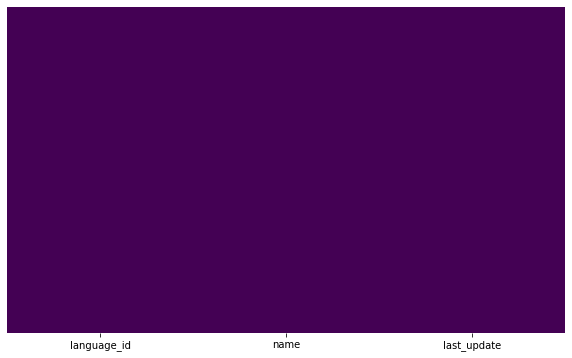

In [79]:
fn.check_nan(language) #Columna entera de nulos

### Valores incorrectos

In [80]:
fn.check_unique(language, columns) #Parece Todo Bien

[1 2 3 4 5 6]
['English' 'Italian' 'Japanese' 'Mandarin' 'French' 'German']
['2006-02-15 05:02:19']


In [81]:
fn.check_value(language, columns) #Parece todo Correcto

1    1
2    1
3    1
4    1
5    1
Name: language_id, dtype: int64
English     1
Italian     1
Japanese    1
Mandarin    1
French      1
Name: name, dtype: int64
2006-02-15 05:02:19    6
Name: last_update, dtype: int64


### Duplicados

In [82]:
language.duplicated().any() #No hay duplicados

False

### Cambio del tipo de dato, optimizacion de memoria

In [83]:
language.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   language_id  6 non-null      int64 
 1   name         6 non-null      object
 2   last_update  6 non-null      object
dtypes: int64(1), object(2)
memory usage: 1016.0 bytes


In [85]:
language.last_update=pd.to_datetime(language.last_update, format='%Y-%m-%d')

language.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   language_id  6 non-null      int64         
 1   name         6 non-null      object        
 2   last_update  6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 608.0 bytes


In [86]:
for c in language.select_dtypes('object').columns:
    
    language[c]=language[c].astype('category')
    
language.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   language_id  6 non-null      int64         
 1   name         6 non-null      category      
 2   last_update  6 non-null      datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 786.0 bytes


In [87]:
for c in language.select_dtypes('integer').columns:
    
    language[c]=pd.to_numeric(language[c], downcast='integer')
    
language.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   language_id  6 non-null      int8          
 1   name         6 non-null      category      
 2   last_update  6 non-null      datetime64[ns]
dtypes: category(1), datetime64[ns](1), int8(1)
memory usage: 744.0 bytes


In [125]:
language.drop(columns='last_update', inplace=True)

In [126]:
language.head()

,language_id,name
0,1,English
1,2,Italian
2,3,Japanese
3,4,Mandarin
4,5,French


# OLD HDD

In [88]:
old.head()

,first_name,last_name,title,release_year,category_id
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,2006,6
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2006,2
2,PENELOPE,GUINESS,ANGELS LIFE,2006,13
3,PENELOPE,GUINESS,BULWORTH COMMANDMENTS,2006,10
4,PENELOPE,GUINESS,CHEAPER CLYDE,2006,14


In [89]:
old.info(memory_usage='deep') #Sin nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   first_name    1000 non-null   object
 1   last_name     1000 non-null   object
 2   title         1000 non-null   object
 3   release_year  1000 non-null   int64 
 4   category_id   1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 207.6 KB


In [90]:
columns = old.columns
columns

Index(['first_name', 'last_name', 'title', 'release_year', 'category_id'], dtype='object')

In [91]:
old.shape

(1000, 5)

### Nulos

'N nan cols: 0'

Series([], dtype: float64)

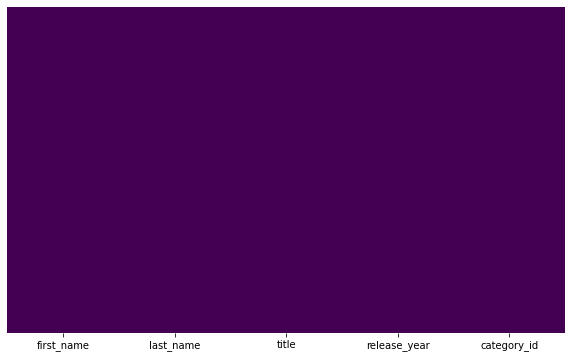

In [92]:
fn.check_nan(old) #Columna sin nulos

### Valores incorrectos

In [93]:
fn.check_unique(old, columns) #Parece Todo Bien

['PENELOPE' 'NICK' 'ED' 'JENNIFER' 'JOHNNY' 'BETTE' 'GRACE' 'MATTHEW'
 'JOE' 'CHRISTIAN' 'ZERO' 'KARL' 'UMA' 'VIVIEN' 'CUBA' 'FRED' 'HELEN'
 'DAN' 'BOB' 'LUCILLE' 'KIRSTEN' 'ELVIS' 'SANDRA' 'CAMERON' 'KEVIN' 'RIP'
 'JULIA' 'WOODY' 'ALEC' 'SISSY' 'TIM' 'MILLA' 'AUDREY' 'JUDY' 'BURT' 'VAL'
 'TOM' 'GOLDIE']
['GUINESS' 'WAHLBERG' 'CHASE' 'DAVIS' 'LOLLOBRIGIDA' 'NICHOLSON' 'MOSTEL'
 'JOHANSSON' 'SWANK' 'GABLE' 'CAGE' 'BERRY' 'WOOD' 'BERGEN' 'OLIVIER'
 'COSTNER' 'VOIGHT' 'TORN' 'FAWCETT' 'TRACY' 'PALTROW' 'MARX' 'KILMER'
 'STREEP' 'BLOOM' 'CRAWFORD' 'MCQUEEN' 'HOFFMAN' 'WAYNE' 'PECK' 'SOBIESKI'
 'HACKMAN' 'DEAN' 'DUKAKIS' 'BOLGER' 'MCKELLEN' 'BRODY']
['ACADEMY DINOSAUR' 'ANACONDA CONFESSIONS' 'ANGELS LIFE'
 'BULWORTH COMMANDMENTS' 'CHEAPER CLYDE' 'COLOR PHILADELPHIA'
 'ELEPHANT TROJAN' 'GLEAMING JAWBREAKER' 'HUMAN GRAFFITI' 'KING EVOLUTION'
 'LADY STAGE' 'LANGUAGE COWBOY' 'MULHOLLAND BEAST' 'OKLAHOMA JUMANJI'
 'RULES HUMAN' 'SPLASH GUMP' 'VERTIGO NORTHWEST' 'WESTWARD SEABISCUIT'
 'WIZARD COL

In [94]:
fn.check_value(old, columns) #Parece todo Correcto

SANDRA    56
VAL       35
UMA       35
JULIA     33
RIP       33
Name: first_name, dtype: int64
OLIVIER    53
PECK       43
KILMER     37
BOLGER     35
WOOD       35
Name: last_name, dtype: int64
BOONDOCK BALLROOM     6
FLASH WARS            5
STRANGER STRANGERS    5
OKLAHOMA JUMANJI      5
CHITTY LOCK           5
Name: title, dtype: int64
2006    1000
Name: release_year, dtype: int64
15    79
1     77
2     75
7     74
13    73
Name: category_id, dtype: int64


### Duplicados

In [95]:
old.duplicated().any() #No hay duplicados

False

### Cambio del tipo de dato, optimizacion de memoria

In [98]:
old.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   first_name    1000 non-null   object
 1   last_name     1000 non-null   object
 2   title         1000 non-null   object
 3   release_year  1000 non-null   int64 
 4   category_id   1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 207.6 KB


In [99]:
for c in old.select_dtypes('object').columns:
    
    old[c]=old[c].astype('category')
    
old.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   first_name    1000 non-null   category
 1   last_name     1000 non-null   category
 2   title         1000 non-null   category
 3   release_year  1000 non-null   int64   
 4   category_id   1000 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 85.2 KB


In [100]:
for c in old.select_dtypes('integer').columns:
    
    old[c]=pd.to_numeric(old[c], downcast='integer')
    
old.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   first_name    1000 non-null   category
 1   last_name     1000 non-null   category
 2   title         1000 non-null   category
 3   release_year  1000 non-null   int16   
 4   category_id   1000 non-null   int8    
dtypes: category(3), int16(1), int8(1)
memory usage: 72.5 KB


# RENTAL

In [102]:
rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


In [103]:
rental.info(memory_usage='deep') #Sin nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rental_id     1000 non-null   int64 
 1   rental_date   1000 non-null   object
 2   inventory_id  1000 non-null   int64 
 3   customer_id   1000 non-null   int64 
 4   return_date   1000 non-null   object
 5   staff_id      1000 non-null   int64 
 6   last_update   1000 non-null   object
dtypes: int64(4), object(3)
memory usage: 254.0 KB


In [104]:
columns = rental.columns
columns

Index(['rental_id', 'rental_date', 'inventory_id', 'customer_id',
       'return_date', 'staff_id', 'last_update'],
      dtype='object')

In [105]:
rental.shape

(1000, 7)

### Nulos

'N nan cols: 0'

Series([], dtype: float64)

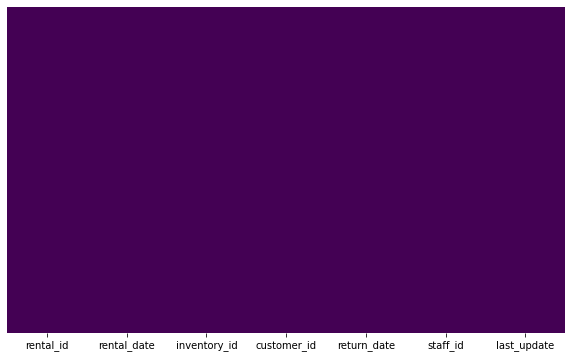

In [106]:
fn.check_nan(rental) #Columna entera de nulos

### Valores incorrectos

In [107]:
fn.check_unique(rental, columns) #Vemos que en el id falta un valor ya que termina en 1001

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  195  196
  197 

In [108]:
fn.check_value(rental, columns) #Parece todo Correcto

1      1
673    1
660    1
661    1
662    1
Name: rental_id, dtype: int64
2005-05-30 14:47:31    2
2005-05-28 22:07:30    1
2005-05-28 20:53:31    1
2005-05-28 21:01:25    1
2005-05-28 21:09:31    1
Name: rental_date, dtype: int64
367     1
1769    1
1414    1
2247    1
2968    1
Name: inventory_id, dtype: int64
197    8
245    6
596    6
274    6
371    6
Name: customer_id, dtype: int64
2005-06-05 15:16:54    2
2005-06-03 06:05:10    2
2005-06-06 06:23:00    2
2005-05-26 22:04:30    1
2005-05-30 15:26:31    1
Name: return_date, dtype: int64
2    521
1    479
Name: staff_id, dtype: int64
2006-02-15 21:30:53    1000
Name: last_update, dtype: int64


In [115]:
num = list(range(1, 1001))
rental.rental_id = num

In [116]:
rental.rental_id.tail() #Corregido

995     996
996     997
997     998
998     999
999    1000
Name: rental_id, dtype: int64

### Duplicados

In [117]:
rental.duplicated().any() #No hay duplicados

False

### Cambio del tipo de dato, optimizacion de memoria

In [118]:
rental.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rental_id     1000 non-null   int64 
 1   rental_date   1000 non-null   object
 2   inventory_id  1000 non-null   int64 
 3   customer_id   1000 non-null   int64 
 4   return_date   1000 non-null   object
 5   staff_id      1000 non-null   int64 
 6   last_update   1000 non-null   object
dtypes: int64(4), object(3)
memory usage: 254.0 KB


In [119]:
rental.last_update=pd.to_datetime(rental.last_update, format='%Y-%m-%d')

rental.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rental_id     1000 non-null   int64         
 1   rental_date   1000 non-null   object        
 2   inventory_id  1000 non-null   int64         
 3   customer_id   1000 non-null   int64         
 4   return_date   1000 non-null   object        
 5   staff_id      1000 non-null   int64         
 6   last_update   1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 187.6 KB


In [120]:
rental.rental_date=pd.to_datetime(rental.rental_date, format='%Y-%m-%d')

rental.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rental_id     1000 non-null   int64         
 1   rental_date   1000 non-null   datetime64[ns]
 2   inventory_id  1000 non-null   int64         
 3   customer_id   1000 non-null   int64         
 4   return_date   1000 non-null   object        
 5   staff_id      1000 non-null   int64         
 6   last_update   1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 121.2 KB


In [121]:
rental.return_date=pd.to_datetime(rental.return_date, format='%Y-%m-%d')

rental.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rental_id     1000 non-null   int64         
 1   rental_date   1000 non-null   datetime64[ns]
 2   inventory_id  1000 non-null   int64         
 3   customer_id   1000 non-null   int64         
 4   return_date   1000 non-null   datetime64[ns]
 5   staff_id      1000 non-null   int64         
 6   last_update   1000 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int64(4)
memory usage: 54.8 KB


In [122]:
for c in rental.select_dtypes('integer').columns:
    
    rental[c]=pd.to_numeric(rental[c], downcast='integer')
    
rental.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rental_id     1000 non-null   int16         
 1   rental_date   1000 non-null   datetime64[ns]
 2   inventory_id  1000 non-null   int16         
 3   customer_id   1000 non-null   int16         
 4   return_date   1000 non-null   datetime64[ns]
 5   staff_id      1000 non-null   int8          
 6   last_update   1000 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int16(3), int8(1)
memory usage: 30.4 KB


In [123]:
rental.drop(columns='last_update', inplace=True)

In [124]:
rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1


# EXTRACCION DE DATOS

In [137]:
actor.to_csv('data_limpio/actor.csv', index=False)
category.to_csv('data_limpio/category.csv', index=False)
film.to_csv('data_limpio/film.csv', index=False)
inventory.to_csv('data_limpio/inventory.csv', index=False)
language.to_csv('data_limpio/language.csv', index=False)
old.to_csv('data_limpio/old_HDD.csv', index=False)
rental.to_csv('data_limpio/rental.csv', index=False)